OMER BIN ALI BAJUBAIR \
AML ASSIGNMENT 6

Question:1 

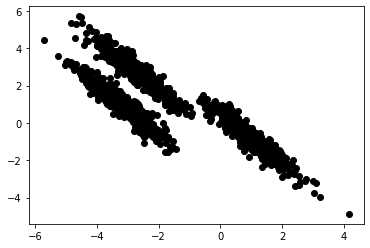

In [9]:
#Generating X_aniso dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

n_samples= 1500
random_state= 170
X, y= datasets.make_blobs(n_samples= n_samples, random_state= random_state)
transformation= [[0.6, -0.6], [-0.4, 0.8]]
X_aniso= np.dot(X, transformation)
plt.plot(X_aniso[:,0], X_aniso[:,1], 'o', color='black')
plt.show()

Question: 2


The K-means algorithm is an iterative process with three critical stages:
Pick initial cluster centroids, Cluster assignment , Move centroid

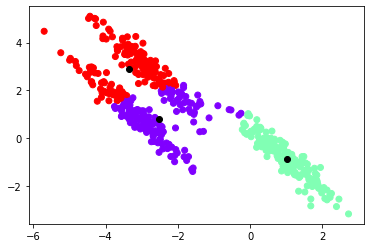

In [2]:
#k-means clustering algorithm (cluster centers are shown by black points)
from sklearn.cluster import KMeans

Kmeans = KMeans(n_clusters=3)
Kmeans.fit(X_aniso)
plt.scatter(X_aniso[:,0], X_aniso[:,1], c=Kmeans.labels_, cmap='rainbow')
plt.scatter(Kmeans.cluster_centers_[:,0] ,Kmeans.cluster_centers_[:,1], color='black')
plt.show()

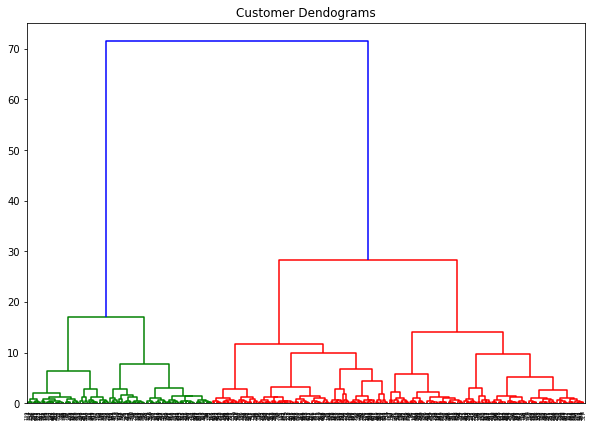

In [3]:
#Finding the number of cluster using dendogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X_aniso, method='ward'))

Agglomerative clustering is a general family of clustering algorithms that build nested clusters by merging data points successively. This hierarchy of clusters can be represented as a tree diagram known as dendrogram. The top of the tree is a single cluster with all data points while the bottom contains individual points.

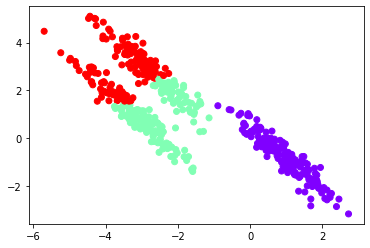

In [4]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_aniso)
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=cluster.labels_, cmap='rainbow')

DBSCAN groups together points that are closely packed together while marking others as outliers which lie alone in low-density regions. There are two key parameters in the model needed to define ‘density’: minimum number of points required to form a dense region min_samples and distance to define a neighborhood eps. Higher min_samples or lower eps demands greater density to form a cluster.

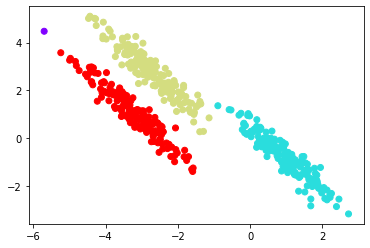

In [5]:
#DBSCAN clustering algorithm
from sklearn.cluster import DBSCAN

dbscan=DBSCAN()
dbscan.fit(X_aniso)
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=dbscan.labels_, cmap='rainbow')

A Gaussian mixture model is a distance based probabilistic model that assumes all the data points are generated from a linear combination of multivariate Gaussian distributions with unknown parameters. Like K-means it takes into account centers of the latent Gaussian distributions but unlike K-means, the covariance structure of the distributions is also taken into account. The algorithm implements the expectation-maximization (EM) algorithm to iteratively find the distribution parameters that maximize a model quality measure called log likelihood.

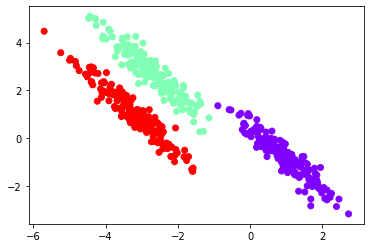

In [6]:
#Gaussian Mixture Model(GMM) clustering algorithm
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(X_aniso)
labels = gmm.predict(X_aniso)
plt.scatter(X_aniso[:,0],X_aniso[:,1], c=labels, cmap='rainbow')

Result Comparison. : <br><br> K-means: After visualizing data points, number of clusters was fixed to 3 but the kmeans algorithm was not able to detect curvy shapes. Moreover it could't reflect the covariance in data. covariance measures the degree to which two variables are linearly associated. However, it is also often used informally as a general measure of how monotonically related two variables are. Miss clustered some data points because of equidistance from the centers (The centers are shown by black points) <br> <br>
Agglomerative: Using horizontal line intersection in dendogram, the number of clusters was determined.It could not also show the covariance in data. <br><br>
DBSCAN: The algorithm showed good clustering resut and did not  need to initialize the number of clusters before. But it made 4 clusters where just one point in one cluster. <br><br>
GMM: GMM algorithm presented the best result here where 3 clusters were formed showing the covariance relation of data.